<a href="https://colab.research.google.com/github/BetterThanMe/pull_data/blob/master/Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

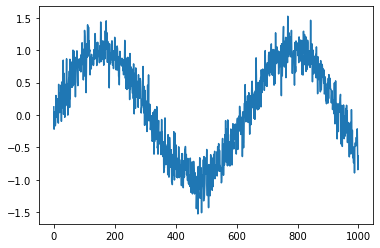

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"  

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.utils import losses_utils
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


#CREATE DATA
T = 1000 #number of points
time = np.arange(0, T, dtype = np.float32)
x = np.sin(0.01*time) + np.random.normal(0,0.2, (T,))

plt.plot(time, x)
#plt.show()

#MODEL
tau = 100 #the number of sample to predict
features = np.zeros((T-tau, tau))

for i in range(tau):
	features[:,i] = x[i: T-tau+i]

labels = x.reshape((-1,1))

batch_size, n_train = 16, 600

def get_model():

	inputs = keras.Input(shape = (tau,))
	
	net = keras.Sequential()
	# Usage in a Keras layer:
	initializer = tf.keras.initializers.GlorotUniform()

	net.add(layers.Dense(20, input_shape = (tau,), activation = tf.nn.relu, kernel_initializer=initializer))
	net.add(layers.Dense(1,input_shape = (1,), kernel_initializer=initializer))

	outputs = net(inputs)

	model = keras.Model(inputs, outputs)

	return model

	

In [ ]:
model = get_model()

num_train = int(0.7*T)

inputs = features[:num_train]
targets = labels[tau:num_train+tau]

#train_net(net, train_iter, 10, 0.01)

num_folds = 10
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
lr = 0.05
for train, test in kfold.split(inputs, targets):

  lr *= 0.5
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr),
				loss = keras.losses.MeanSquaredError(reduction=losses_utils.ReductionV2.AUTO, name='mean_squared_error'))
  
  model.fit(inputs, targets, batch_size = 30, epochs= 12) 

Epoch 1/12
24/24 [==============================] - 0s 1ms/step - loss: 1.5232
Epoch 2/12
24/24 [==============================] - 0s 1ms/step - loss: 0.2231
Epoch 3/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0747
Epoch 4/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0566
Epoch 5/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0546
Epoch 6/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 7/12
24/24 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 8/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 9/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 10/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 11/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 12/12
24/24 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 1/12
24/24 [==============================]

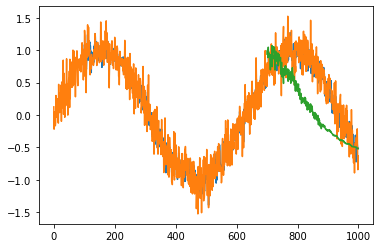

In [ ]:
estimates = model.predict(features)

vector = features[num_train-1,:]
predicts = []
new_vector = np.zeros((tau,))

for i in range(num_train, T):
  pred = model.predict(vector.reshape(-1,tau)).reshape(-1)[0]
  predicts.append(pred)
  new_vector[:tau-1] = vector[1:]
  new_vector[tau-1] = pred
  vector = new_vector

plt.plot(time[tau:], estimates.reshape(-1))
plt.plot(time, x)
plt.plot(time[num_train:], predicts)
plt.show()